In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [57]:
battLev = pd.read_csv('allbatterylevels_limited.csv')
battLev.sort_values(['phone_number','ts'])

,phone_number,ts,level
0,2018159770,1534913282,81
1,2018159770,1534913877,80
2,2018159770,1534915206,79
3,2018159770,1534917026,78
4,2018159770,1534918867,77
...,...,...,...
1461799,9897454601,1541473163,24
1461800,9897454601,1541473225,25
1461801,9897454601,1541473286,26
1461802,9897454601,1541473348,27


In [58]:
#battLev['ts'] = round(battLev['ts']/10,0)

In [59]:
locations = pd.read_csv("alllocations_limited.csv")
#locations = locations[round(locations.latitude,0) == 41]
#locations = locations[round(locations.longitude,0) == -86]
locations.sort_values('ts')

,phone_number,ts,latitude,longitude,accuracy
207712,2245450936,1534809602,41.702862,-86.239554,5
2763308,9706911167,1534809604,41.702835,-86.232993,16
2323201,8168760202,1534809606,41.720952,-86.167948,65
113189,2149062229,1534809618,41.702817,-86.237503,65
2074347,7406291997,1534809618,41.703410,-86.238207,10
...,...,...,...,...,...
1378687,5743390378,1542822500,41.704801,-86.230014,65
1378688,5743390378,1542822672,41.705310,-86.229822,10
1378689,5743390378,1542822858,41.705215,-86.229929,10
1378690,5743390378,1542823040,41.705196,-86.229885,30


## Attempts to Merge Battery + Location Data --> broken right now

In [67]:
#locations['key'] = str(locations['phone_number'].map(str) + locations["ts"].map(str))
#locations['key'].map(int)

In [68]:
#mer = pd.merge_asof(locations, battLev, on='ts', direction = 'nearest')

In [69]:
#battLev['key'] = battLev['phone_number'].map(str) + battLev["ts"].map(str)
#battLev

In [70]:
#df=pd.merge(df0, df1, on='Date', how='outer')   
#df=df.sort(['Date'], ascending=[1])
#headertofill=list(df1.columns.values)
#df[headertofill]=df[headertofill].fillna(method='pad')
#df=df[pd.isnull(df[var_from_df0_only])==False] 

In [66]:
# data and signal are want we want to merge
#keys = ['phone_number', 'ts']  # Could be simply ['timestamp']
#index = locations.loc[keys].set_index(keys).index  # Make index from columns to merge on
#padded = battLev.reindex(index, method='pad')  # Key step -- reindex with filling
#joined = locations.join(padded, on=keys)  # Join to data if needed

In [71]:
merged = pd.merge(left=locations,right=battLev, left_on=['phone_number','ts'], right_on=['phone_number','ts'])
merged.sort_values('latitude')

,phone_number,ts,latitude,longitude,accuracy,level
5141,6086303366,1539866855,-0.276493,-78.545587,5,98
5140,6086303366,1539866315,-0.276393,-78.545441,5,99
5139,6086303366,1539633349,-0.240242,-78.543863,5,79
171,2025315435,1539938961,-0.193797,-78.416464,5,18
173,2025315435,1539998570,-0.193653,-78.416572,5,11
...,...,...,...,...,...,...
7755,8168760202,1540034936,48.237162,-114.126907,10,56
7756,8168760202,1540052946,48.237162,-114.126907,10,98
7751,8168760202,1539853638,48.237162,-114.126907,10,76
7749,8168760202,1539590284,48.237162,-114.126907,10,27


In [72]:
a = merged.groupby(['latitude','longitude', 'level'], as_index = False).count()
a

,latitude,longitude,level,phone_number,ts,accuracy
0,-0.276493,-78.545587,98,1,1,1
1,-0.276393,-78.545441,99,1,1,1
2,-0.240242,-78.543863,79,1,1,1
3,-0.193797,-78.416464,18,1,1,1
4,-0.193653,-78.416572,11,1,1,1
...,...,...,...,...,...,...
8834,48.237162,-114.126907,56,1,1,1
8835,48.237162,-114.126907,76,1,1,1
8836,48.237162,-114.126907,92,1,1,1
8837,48.237162,-114.126907,98,1,1,1


In [77]:
sub1 = battLev[battLev['phone_number'] == 6086303366]
sub1

,phone_number,ts,level
798619,6086303366,1534810261,70
798620,6086303366,1534811381,69
798621,6086303366,1534812021,68
798622,6086303366,1534812818,69
798623,6086303366,1534812918,70
...,...,...,...
806439,6086303366,1541712893,58
806440,6086303366,1541713153,57
806441,6086303366,1541713753,56
806442,6086303366,1541713933,55


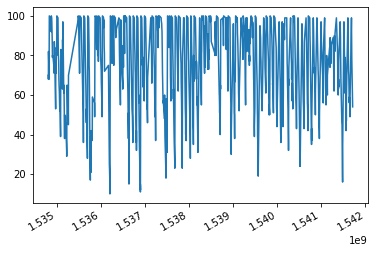

In [78]:
fig, ax = plt.subplots()
plt.plot(sub1['ts'], sub1['level'])
fig.autofmt_xdate()

In [77]:
batt_state = pd.read_csv('battery_state.csv')

In [84]:
grouped_batt_state = batt_state.groupby(['phone_number', 'state'], as_index=False).count()
grouped_batt_state

,phone_number,state,time_stamp
0,524966985,charging,117
1,524966985,full \n,53
2,524966985,unplugged,74
3,838921543,charging,127
4,838921543,full \n,19
5,838921543,unplugged,123
6,1112223311,charging,5
7,1112223311,unplugged,6
8,1112223322,charging,12
9,1112223322,full \n,3


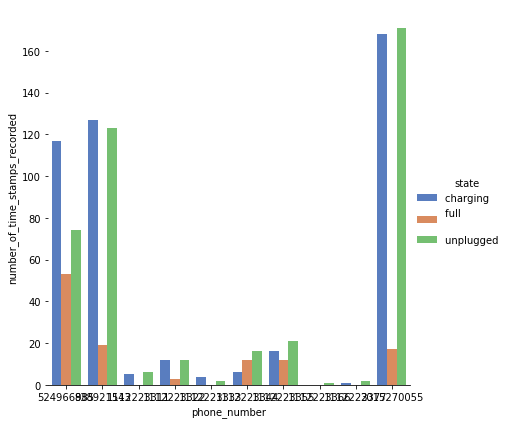

In [91]:
g = sns.catplot(x="phone_number", y="time_stamp", hue="state", data=grouped_batt_state,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number_of_time_stamps_recorded")

In [11]:
subject1_location = pd.read_csv("0524966985.csv")

In [18]:
subject1_location.head()

,time_stamp,latitude,longitude,accuracy
0,1517081157139,31.729256,35.202629,65
1,1517081337214,31.729256,35.202629,65
2,1517081517305,31.729256,35.202629,65
3,1517081697348,31.729256,35.202629,65
4,1517081877456,31.729256,35.202629,65


In [32]:
locations = subject1_location[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)

1000

In [42]:
map = folium.Map(location=[31.73, 35.202], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=subject1_location['time_stamp'][point]).add_to(map)
map

In [39]:
subject2_location = pd.read_csv("0838921543.csv")
locations2 = subject2_location[['latitude', 'longitude']]
locationlist2 = locations2.values.tolist()
len(locationlist2)
subject2_location.head()

,phone_number,time_stamp,latitude,longitude,accuracy,dictionary
0,838921543,1525170785926,49.307585,16.648831,1242,0
1,838921543,1525170810424,49.309807,16.641874,200,0
2,838921543,1525170981144,49.344143,16.647965,10,0
3,838921543,1525171161071,49.381662,16.635564,5,0
4,838921543,1525171341085,49.381662,16.635564,5,1


In [41]:
map2 = folium.Map(location=[49.3, 16.6], zoom_start=12)
for point in range(0, len(locationlist2)):
    folium.Marker(locationlist2[point], popup=subject2_location['time_stamp'][point]).add_to(map)
map2